In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## 3 Вариант

In [2]:
x_coords = [-2, -1, 0, 1, 2]
y_coords = [16, 7, 4, 4, 2]

x_coords = [-2, 0, 1, 2, 4]
y_coords = [9, 12, 13, 25, 90]

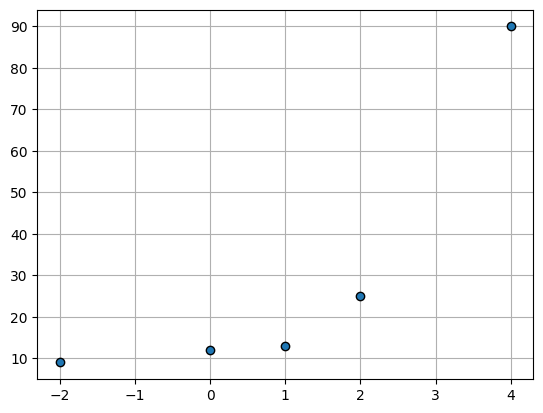

In [3]:
fig, ax = plt.subplots()

ax.scatter(x_coords, y_coords, edgecolors="black", zorder=2)
ax.grid()

In [4]:
a, b, c, d, x = sp.symbols("a b c d x")

coef = (a, b, c, d)

In [5]:
func = a * x ** 3 + b * x ** 2 + c * x + d
func

a*x**3 + b*x**2 + c*x + d

In [6]:
def phi(func, x_, y):
	return (y - func.subs(x, x_)) ** 2

In [7]:
def get_diff(func, p):
	return func.diff(p)

In [8]:
def get_funcs(func, *args):
	phi_i = [0] * len(args)
	for i, p in enumerate(args):
		for dot in zip(x_coords, y_coords):
			phi_i[i] += phi(func, *dot)
		
		phi_i[i] = get_diff(phi_i[i], p)

	return phi_i

In [9]:
funcs = get_funcs(func, *coef)
for func in funcs:
	print(func, func.as_coefficients_dict())

8450*a + 2050*b + 578*c + 130*d - 11802 defaultdict(<class 'int'>, {1: -11802, d: 130, c: 578, b: 2050, a: 8450})
2050*a + 578*b + 130*c + 50*d - 3178 defaultdict(<class 'int'>, {1: -3178, d: 50, c: 130, b: 578, a: 2050})
578*a + 130*b + 50*c + 10*d - 810 defaultdict(<class 'int'>, {1: -810, d: 10, c: 50, b: 130, a: 578})
130*a + 50*b + 10*c + 10*d - 298 defaultdict(<class 'int'>, {1: -298, c: 10, d: 10, b: 50, a: 130})


In [10]:
def correct_coef(funcs, *args):
	a = []
	b = []

	for func in funcs:
		prev_func = func.as_coefficients_dict()
		prev_coef = prev_func.keys()

		tmp = []
		for coef in args:
			if coef not in prev_coef:
				tmp += [0]
			else:
				tmp += [np.float64(prev_func[coef])]
		
		if 1 in prev_func:
			b += [np.float64(prev_func[1]) * (-1)]
		
		else:
			b += [0]
		
		a += [tmp]

	return np.array(a), np.array(b)

In [11]:
funcs = correct_coef(funcs, *coef)
funcs

(array([[8450., 2050.,  578.,  130.],
        [2050.,  578.,  130.,   50.],
        [ 578.,  130.,   50.,   10.],
        [ 130.,   50.,   10.,   10.]]),
 array([11802.,  3178.,   810.,   298.]))

In [12]:
coef = np.linalg.solve(*funcs)
coef

array([ 0.875     ,  1.32738095,  0.3452381 , 11.44285714])

In [13]:
def f(x, a, b, c, d):
	return a * x ** 3 + b * x ** 2 + c * x + d

In [14]:
x = np.linspace(-5, 7, 100)
y = f(x, *coef)

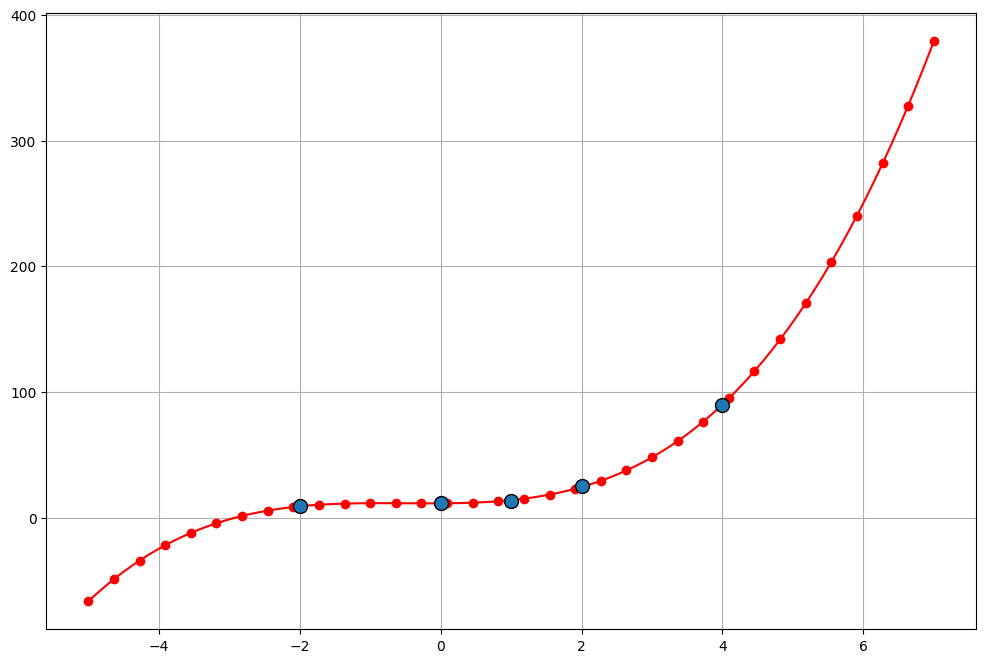

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(x_coords, y_coords, edgecolors="black", zorder=3, s=100)
ax.plot(x, y, "o-r", markevery=3, zorder=2)
ax.grid()